# <center>SPBU ML<br>Задача 2. Сравнение методов классификации<br>Heart Disease</center>

Нигматулин Максим Владиславович, 22.М07-мм
  
<br>✅
 Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
 <br>✅Взять данные для предсказания заболеваний сердца тут (целевой признак для предсказания --- target). Демо блакнот с анализом этих данных можно найти тут.
 <br>✅Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
 <br>✅Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
 <br>✅ри необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
 <br>✅Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
 <br>✅Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).
 <br>✅Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
 <br>✅* (+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.
 <br>✅* (+2 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')  # отключаем предупреждения

## Чтение данных

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Возьмём данные заболеваний сердца у пациентов, которые можно скачать [тут](https://www.kaggle.com/code/ahmedadell30/heart-disease-prediction-with-ann-models/data).

Описание датасета: <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

Необходимо решить задачу классификации и научиться предсказывать целовой признак **target** имеет ли пациент заболевание сердца.

## EDA

Посмотрим, интерпретируем старые и новые графики, попробуем обнаружить зависимости

In [3]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


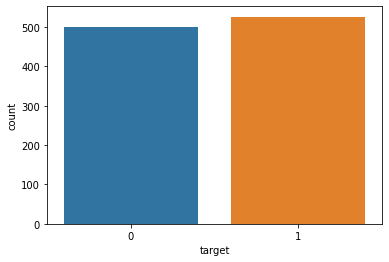

In [5]:
sns.countplot(x="target", data=df)
plt.show()

Из обратившихся в клинику больних и "здоровых" поровну, количество субъектов двух классов сравнимо и почти одинаково, для обучения моделей это хорошо. 

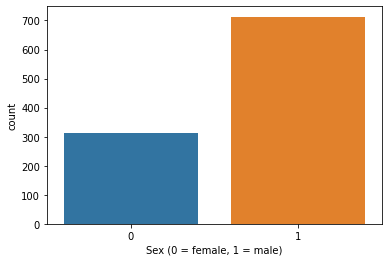

In [6]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

Заметим, что в клинику чаще обращаются мужчины, поэтому все следующие догадки о данных будут смещены в соответствии с каким-то правилом: может быть женщины реже обращаются в клинику, или образаются только в критических случаях, или меньше подвержены порокам сердца

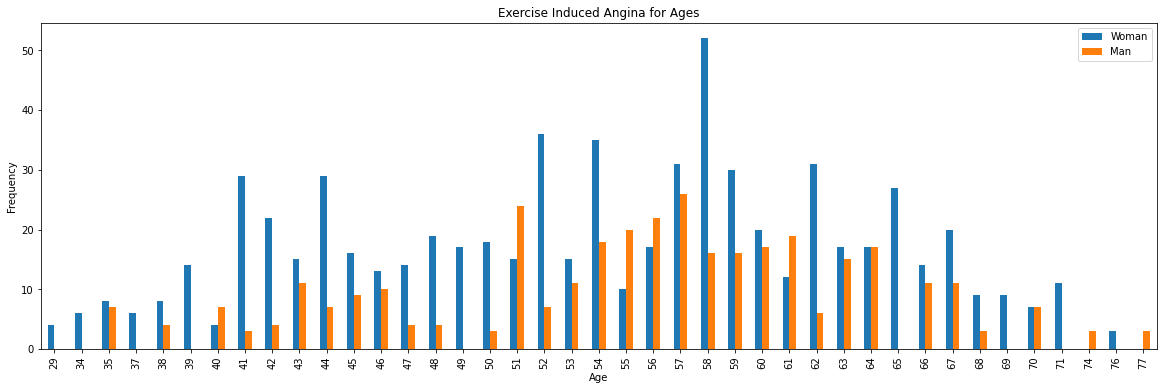

In [7]:
pd.crosstab(df.age, df.exang).plot(kind="bar", figsize=(20, 6))
plt.title('Exercise Induced Angina for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Woman", "Man"])
plt.show()

Оказывается, у лбдей постарше физические упражнения могут быть причиной ангины(воспаления миндалин). По графу видно, что чаще почти по всем возрастам она наблюдается у женщин

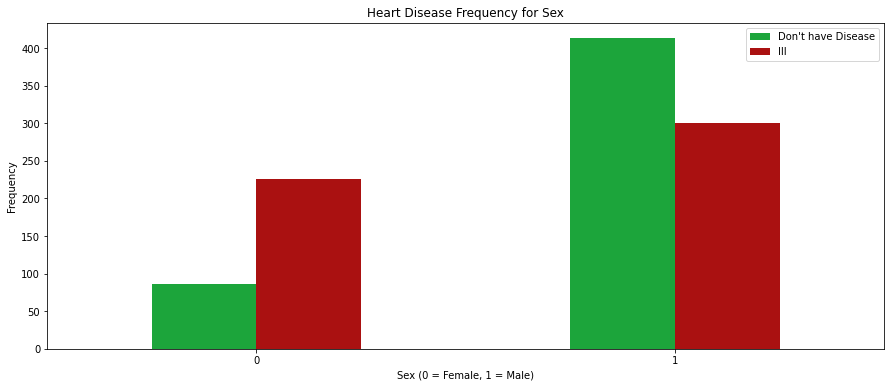

In [8]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Ill"])
plt.ylabel('Frequency')
plt.show()

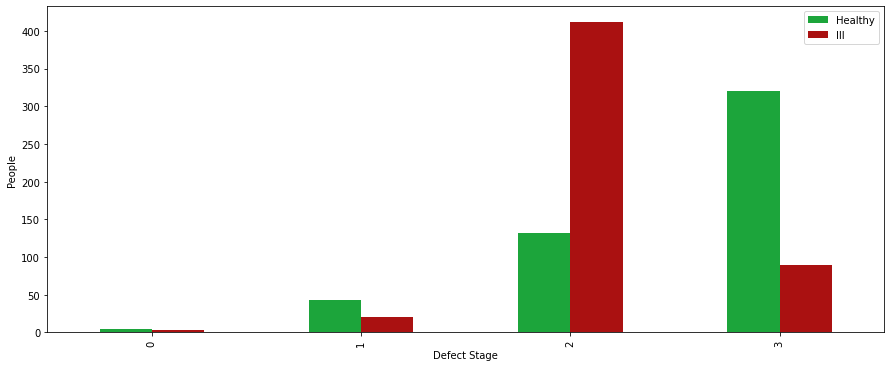

In [9]:
pd.crosstab(df.thal,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111'])
plt.legend(["Healthy", "Ill"])
plt.xlabel("Defect Stage")
plt.ylabel("People")
plt.show()

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect  
Видно, что есть 4 категории "дефектности" сердца, при этом чем выше дефектность, тем больше вероятность, что человек больной. При этом видно, что в клинику обратилось большое количество людей с дефектом третьей ступени, при этом порока сердца у них нет, видимо, это как-то влияет на самочувствие или врачи по предварительному скану сердца рекомендуют обследоваться на пороки сердца. Видно, что люди с зафиксированным дефектом чаще остальных подвержены порокам сердца


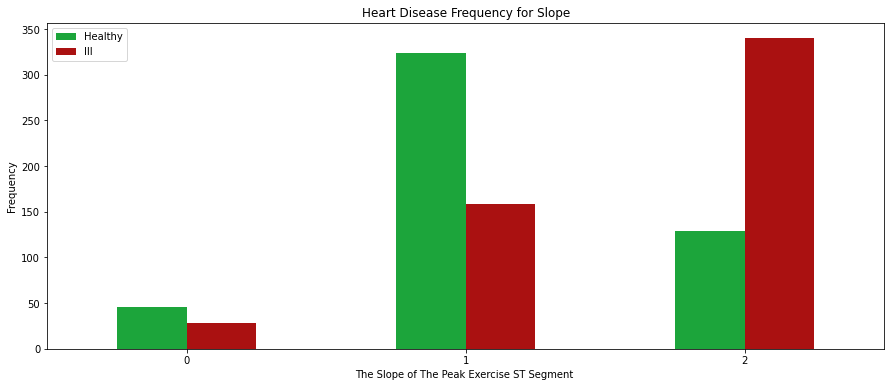

In [10]:
pd.crosstab(df.slope,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111'])
plt.legend(["Healthy", "Ill"])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

По этим данным видно, что "наклон пикового сегмента" влияет на вероятность быть пораженым пороком сердца, есть множество "здоровых" людей, обратившихся в клинику и не имеющих порока, ситуация схожа с прошлым графиком

### Преобразование категориальных признаков

Закодируем категориальные признаки **cp**, **thal** и **slope**.

In [12]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
cp_dum, thal_dum, slope_dum, frames = None, None, None, None
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [13]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


## Разбиение данных с использованием train_test_split и масштабирование

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

accuracies = {}

### K-Nearest Neighbour

In [15]:
from knn import KNN
from sklearn.model_selection import GridSearchCV


k_grid = list(range(1, 7))
p_minkoswki_grid = list(range(1, 7))

knn_searcher = GridSearchCV(
    estimator=KNN(),
    param_grid=[{"k": k_grid, "p_minkoswki": p_minkoswki_grid}],
    cv=5
)
knn_tuned = {'k': 1, 'p_minkoswki': 2}
if knn_tuned == None:
  knn_searcher.fit(X_train_scaled, y_train)
  print(knn_searcher.best_params_) # {'k': 1, 'p_minkoswki': 2}


In [16]:
knn = KNN(k=1, p_minkowski=2)
knn.fit(X_train_scaled, y_train)

knn_accuracy = knn.score(X_test_scaled, y_test)
accuracies["KNN"] = knn_accuracy
print(f"KNN Test Accuracy {knn_accuracy}")

KNN Test Accuracy 0.9707792207792207


built-in:

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


leaf_size_grid = list(range(1,50))
n_neighbors_grid = list(range(1,30))
p_grid=[1,2]

builtin_knn_searcher = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=[{"leaf_size": leaf_size_grid, "n_neighbors": n_neighbors_grid, "p": p_grid}],
    cv=5
)
builtin_knn_tuned = {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}
if builtin_knn_tuned == None:
  builtin_knn_searcher.fit(X_train_scaled, y_train)
  print(builtin_knn_searcher.best_params_) # {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}

In [18]:
builtin_knn = KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)
builtin_knn.fit(X_train_scaled, y_train)

builtin_knn_accuracy = builtin_knn.score(X_test_scaled, y_test)
accuracies["Built-in KNN"] = builtin_knn_accuracy
print(f"Built-in KNN Test Accuracy {builtin_knn_accuracy}")

Built-in KNN Test Accuracy 0.9805194805194806


## Decision Tree

In [19]:
from sklearn.model_selection import GridSearchCV
from decision_tree import DTC


max_depth_grid = list(range(3, 40))
min_samples_split_grid = [5, 10, 20, 50, 100]

dtc_searcher = GridSearchCV(
    estimator=DTC(),
    param_grid=[{"max_depth": max_depth_grid, "min_samples_split": min_samples_split_grid}],
    cv=5
)
dtc_tuned = {'max_depth': 11, 'min_samples_split': 5}
if dtc_tuned == None:
  dtc_searcher.fit(X_train, y_train)
  print(dtc_searcher.best_params_) # {'max_depth': 11, 'min_samples_split': 1}


In [20]:
dtc = DTC(11, 5)
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)
accuracies['Decision Tree'] = acc
print(f"Decision Tree Test Accuracy {acc}")

Decision Tree Test Accuracy 0.9642857142857143


built-in:

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

max_depth_grid = list(range(3, 40))
min_samples_split_grid = [5, 10, 20, 50, 100]
criterion_grid = ["gini", "entropy"]

builtin_dtc_searcher = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=[{"max_depth": max_depth_grid, "min_samples_split": min_samples_split_grid, "criterion": criterion_grid}],
    cv=5
)
builtin_dtc_tuned = {'criterion': 'entropy', 'max_depth': 29, 'min_samples_split': 5}
if builtin_dtc_tuned == None:
  builtin_dtc_searcher.fit(X_train, y_train)
  print(builtin_dtc_searcher.best_params_) # {'criterion': 'entropy', 'max_depth': 29, 'min_samples_split': 5}


In [22]:
builtin_dtc = sklearn.tree.DecisionTreeClassifier(criterion="entropy", max_depth=29, min_samples_split=5)
builtin_dtc.fit(X_train, y_train)

acc = builtin_dtc.score(X_test, y_test)
accuracies['Built-in Decision Tree'] = acc
print(f"Built-int Decision Tree Test Accuracy {acc}")

Built-int Decision Tree Test Accuracy 0.974025974025974


### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

max_depth_grid = list(range(3, 40))
min_samples_split_grid = list(range(1, 7))

solver_grid = ['newton-cg', 'lbfgs', 'liblinear']
penalty_grid = ['none', 'l1', 'l2', 'elasticnet']
C_grid = [100, 10, 1.0, 0.1, 0.01]

lr_searcher = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=[{"solver": solver_grid, "penalty": penalty_grid, "C": C_grid}],
    cv=5
)
lr_tuned = {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
if lr_tuned == None:
  lr_searcher.fit(X_train_scaled, y_train)
  print(lr_searcher.best_params_) # {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}


In [24]:
lr = LogisticRegression(C=100, penalty="none", solver="newton-cg")
lr.fit(X_train_scaled, y_train)

acc = lr.score(X_test_scaled, y_test)
accuracies['Logistic Regression'] = acc
print(f"Logistic Regression Test Accuracy {acc}")

Logistic Regression Test Accuracy 0.8084415584415584


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### SVC

In [38]:
from sklearn.svm import SVC


C_grid = [0.1,1, 10, 100]
gamma_grid = [1,0.1,0.01,0.001]
kernel_grid = ['rbf', 'poly', 'sigmoid']

svc_searcher = GridSearchCV(
    estimator=SVC(),
    param_grid=[{'C': C_grid, 'gamma': gamma_grid, 'kernel': kernel_grid}],
    cv=5
)
svc_tuned = {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
if svc_tuned == None:
  svc_searcher.fit(X_train_scaled, y_train)
  print(svc_searcher.best_params_) # {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


In [39]:
svc = SVC(C=0.1, gamma=1, kernel='poly')
svc.fit(X_train_scaled, y_train)

acc = svc.score(X_test_scaled, y_test)
accuracies['SVC'] = acc
print(f"SVC Test Accuracy {acc}")

SVC Test Accuracy 0.9805194805194806


### Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

bayes_searcher = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=[{'var_smoothing': np.logspace(0,-9, num=100)}],
    cv=5
)
bayes_tuned = None
if bayes_tuned == None:
  bayes_searcher.fit(X_train_scaled, y_train)
  print(bayes_searcher.best_params_) # 


{'var_smoothing': 0.15199110829529336}


In [29]:
bayes = GaussianNB(var_smoothing=0.15199110829529336)
bayes.fit(X_train_scaled, y_train)

acc = bayes.score(X_test_scaled, y_test)
accuracies['Naive Bayes'] = acc
print(f"Naive Bayes Test Accuracy {acc}")

Naive Bayes Test Accuracy 0.8181818181818182


## Comparing Models

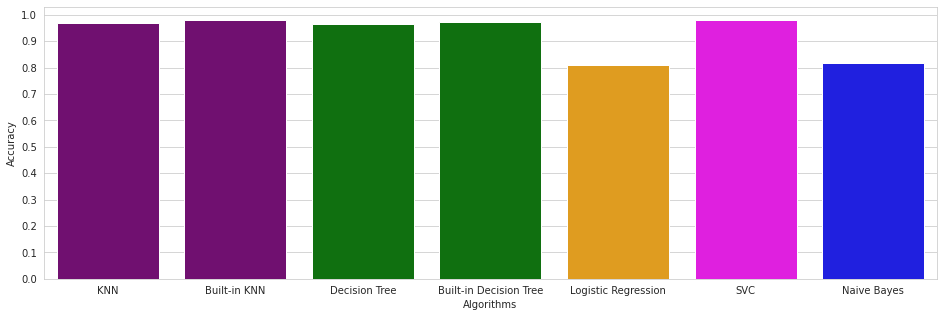

In [35]:
colors = ["purple", "purple", "green", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Confusion Matrix

In [41]:
# Predicted values

y_head_knn = knn.predict(X_test_scaled)
y_head_builtin_knn = builtin_knn.predict(X_test_scaled)
y_head_dtc = dtc.predict(X_test)
y_head_builtin_dtc = builtin_dtc.predict(X_test)
y_head_lr = lr.predict(X_test_scaled)
y_head_svm = svc.predict(X_test_scaled)
y_head_bayes = bayes.predict(X_test_scaled)


In [42]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, y_head_knn)
cm_b_knn = confusion_matrix(y_test, y_head_builtin_knn)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_b_dtc = confusion_matrix(y_test, y_head_builtin_dtc)
cm_lr = confusion_matrix(y_test, y_head_lr)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_bayes = confusion_matrix(y_test, y_head_bayes)


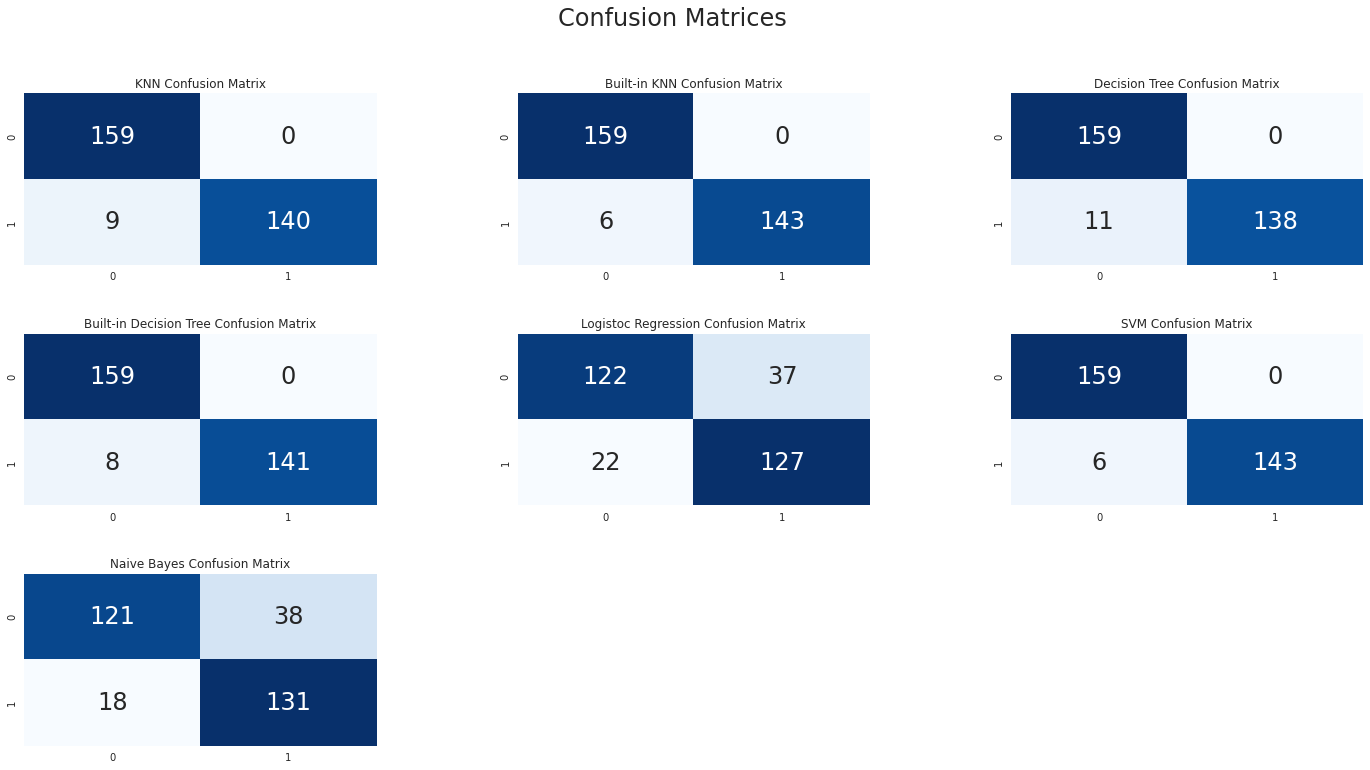

In [43]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

cm = " Confusion Matrix"

plt.subplot(3,3,1)
plt.title("KNN" + cm)
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("Built-in KNN" + cm)
sns.heatmap(cm_b_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Decision Tree" + cm)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Built-in Decision Tree" + cm)
sns.heatmap(cm_b_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Logistoc Regression" + cm)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("SVM" + cm)
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Naive Bayes" + cm)
sns.heatmap(cm_bayes,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## Вывод
1. Видно, что реализованные классификаторы немного отстают от встроенных из-за меньшего количества гиперпараметров. 
2. confusion-матрицы показывают, что KNN, SVM и Decision Tree не выдают ложно-положительный результат, "пессимистичны", в отличие от логистической регрессии, наивного Байеса.
3. Лучше всего на этой задаче себя показывают KNN и SVM. KNN, что любопытно, лучше всего работает с 1 соседом, вероятно, субъекты расположены достаточно кучно, что хорошо и для SVM.